In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


plt.rcParams['figure.figsize'] = [16, 10]
%matplotlib inline

# Read Data

We can choose any certain person, in this case we choose MAC000322

In [17]:
df = pd.read_csv('block_10.csv', parse_dates=['day'])
df = df[df['LCLid'] == 'MAC000322']
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,MAC000322,2014-02-23,0.130,0.124,0.131,0.184,0.176,0.641,0.090,0.092,...,0.150,0.167,0.074,0.091,0.339,0.425,0.063,0.055,0.103,0.208
715,MAC000322,2014-02-24,0.220,0.120,0.113,0.115,0.130,0.075,0.074,0.213,...,0.158,0.094,0.073,0.269,0.129,0.075,0.075,0.088,0.145,0.105
716,MAC000322,2014-02-25,0.096,0.118,0.175,0.161,0.100,0.075,0.117,0.133,...,0.061,0.100,0.384,0.162,0.100,0.075,0.075,0.124,0.125,0.134
717,MAC000322,2014-02-26,0.151,0.160,0.564,0.598,0.133,0.126,0.184,0.154,...,0.011,0.011,0.093,0.074,0.102,0.118,0.127,0.062,0.028,0.037


# Data Preprocessing

The data has row per day, with columns of 30 min intervals, we need only one column with datetime instead of 48 columns to represent the time and another column with the energy consumption for each 30 min interval. 

In [18]:
def convert_standard_form_to_expand_time_series(standard_df, consumer_id,  verbose=False):
   # Similar to compact steps
  expand_df = pd.melt(standard_df, id_vars=['day','LCLid'],value_name='energy_consumption',var_name='offset')
  expand_df['offset'] = expand_df['offset'].str.replace('hh_','').astype(int)
  expand_df = expand_df.sort_values(by=['day','offset']).reset_index(drop=True)
  expand_df['frequency'] = '30min'
  expand_df['serie_length'] = len(expand_df)
  ## Here we resample our day column to construct a timestamp column with frequenct 30min
  expand_df['timestamp'] = pd.date_range(start=standard_df['day'].min(), freq='30min', periods=len(expand_df))
  ## Drop unnecessary columns
  expand_df = expand_df.drop(columns=['day','offset'])
  expand_df = expand_df[['LCLid','timestamp','energy_consumption','frequency','serie_length']]
  if verbose:
    display(expand_df)
  return expand_df

In [19]:
expanded_df = convert_standard_form_to_expand_time_series(df, 'MAC000322').drop(columns=['serie_length','frequency'])
expanded_df

,LCLid,timestamp,energy_consumption
0,MAC000322,2012-03-07 00:00:00,0.125
1,MAC000322,2012-03-07 00:30:00,0.104
2,MAC000322,2012-03-07 01:00:00,0.133
3,MAC000322,2012-03-07 01:30:00,0.145
4,MAC000322,2012-03-07 02:00:00,0.109
...,...,...,...
34507,MAC000322,2014-02-23 21:30:00,0.116
34508,MAC000322,2014-02-23 22:00:00,0.108
34509,MAC000322,2014-02-23 22:30:00,0.129
34510,MAC000322,2014-02-23 23:00:00,0.058


In [20]:
expanded_df.describe()

,timestamp,energy_consumption
count,34512,34511.000000
mean,2013-03-01 11:45:00,0.106438
min,2012-03-07 00:00:00,0.009000
25%,2012-09-02 17:52:30,0.053000
50%,2013-03-01 11:45:00,0.083000
75%,2013-08-28 05:37:30,0.124000
max,2014-02-23 23:30:00,1.159000
std,NaN,0.105291


We will import additional data that will be useful in our analysis

In [21]:
additional = pd.read_csv("weather_hourly_darksky.csv", parse_dates=['time'])
additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   visibility           21165 non-null  float64       
 1   windBearing          21165 non-null  int64         
 2   temperature          21165 non-null  float64       
 3   time                 21165 non-null  datetime64[ns]
 4   dewPoint             21165 non-null  float64       
 5   pressure             21152 non-null  float64       
 6   apparentTemperature  21165 non-null  float64       
 7   windSpeed            21165 non-null  float64       
 8   precipType           21165 non-null  object        
 9   icon                 21165 non-null  object        
 10  humidity             21165 non-null  float64       
 11  summary              21165 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.9+ MB


In [22]:
holidays = pd.read_csv("uk_bank_holidays.csv", parse_dates=['Bank holidays'])
holidays

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day)
9,2013-12-26,Boxing Day


In [23]:
add_info = pd.merge(additional, holidays, left_on='time', right_on='Bank holidays', how='left')
add_info = add_info.rename(columns={'Bank holidays': 'holiday'})
add_info.fillna(False, inplace=True)
add_info.drop(columns=['Type'], inplace=True)
add_info['holiday'][add_info['holiday'] != False] = True
add_info

/tmp/ipykernel_20580/2443437420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_info['holiday'][add_info['holiday'] != False] = True


,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,holiday
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy,False
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy,False
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy,False
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy,False
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy,False
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear,False
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear,False
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear,False


In [24]:
data = pd.merge(expanded_df, add_info, how='left', left_on='timestamp', right_on='time')
data

,LCLid,timestamp,energy_consumption,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,holiday
0,MAC000322,2012-03-07 00:00:00,0.125,13.31,199.0,5.53,2012-03-07 00:00:00,2.41,1024.14,2.65,3.76,rain,partly-cloudy-night,0.80,Partly Cloudy,False
1,MAC000322,2012-03-07 00:30:00,0.104,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MAC000322,2012-03-07 01:00:00,0.133,12.94,202.0,5.72,2012-03-07 01:00:00,2.45,1023.4,2.53,4.39,rain,partly-cloudy-night,0.80,Partly Cloudy,False
3,MAC000322,2012-03-07 01:30:00,0.145,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MAC000322,2012-03-07 02:00:00,0.109,13.37,204.0,5.84,2012-03-07 02:00:00,2.60,1022.34,2.47,4.83,rain,clear-night,0.80,Clear,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34507,MAC000322,2014-02-23 21:30:00,0.116,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34508,MAC000322,2014-02-23 22:00:00,0.108,14.00,174.0,10.10,2014-02-23 22:00:00,5.58,1010.05,10.10,6.06,rain,clear-night,0.74,Clear,False
34509,MAC000322,2014-02-23 22:30:00,0.129,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34510,MAC000322,2014-02-23 23:00:00,0.058,14.31,173.0,9.63,2014-02-23 23:00:00,5.58,1009.69,7.03,5.28,rain,clear-night,0.76,Clear,False


We need to fill the missing values here. let's take the mean approach for interpolation.

Note: The following cell was written by the  help of Copilot. The previous cells were written by Me.

In [25]:
# Copilot prompt: 
# "I want to fill the numerical missing values in a DataFrame 
# using the spline interpolation method."
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = data[col].interpolate(method='spline', order=3)

data

,LCLid,timestamp,energy_consumption,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,holiday
0,MAC000322,2012-03-07 00:00:00,0.125,13.310000,199.000000,5.530000,2012-03-07 00:00:00,2.410000,1024.14,2.650000,3.760000,rain,partly-cloudy-night,0.800000,Partly Cloudy,False
1,MAC000322,2012-03-07 00:30:00,0.104,13.076256,200.535182,5.138001,NaT,1.428535,NaN,2.674268,5.482299,NaN,NaN,0.708079,NaN,NaN
2,MAC000322,2012-03-07 01:00:00,0.133,12.940000,202.000000,5.720000,2012-03-07 01:00:00,2.450000,1023.4,2.530000,4.390000,rain,partly-cloudy-night,0.800000,Partly Cloudy,False
3,MAC000322,2012-03-07 01:30:00,0.145,13.971702,203.474782,5.629329,NaT,2.537042,NaN,2.458219,5.638353,NaN,NaN,0.708123,NaN,NaN
4,MAC000322,2012-03-07 02:00:00,0.109,13.370000,204.000000,5.840000,2012-03-07 02:00:00,2.600000,1022.34,2.470000,4.830000,rain,clear-night,0.800000,Clear,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34507,MAC000322,2014-02-23 21:30:00,0.116,14.038285,175.916536,10.179513,NaT,6.055966,NaN,9.426990,6.342222,NaN,NaN,0.867266,NaN,NaN
34508,MAC000322,2014-02-23 22:00:00,0.108,14.000000,174.000000,10.100000,2014-02-23 22:00:00,5.580000,1010.05,10.100000,6.060000,rain,clear-night,0.740000,Clear,False
34509,MAC000322,2014-02-23 22:30:00,0.129,14.521666,173.479948,9.208093,NaT,5.933318,NaN,8.363793,5.795226,NaN,NaN,0.867317,NaN,NaN
34510,MAC000322,2014-02-23 23:00:00,0.058,14.310000,173.000000,9.630000,2014-02-23 23:00:00,5.580000,1009.69,7.030000,5.280000,rain,clear-night,0.760000,Clear,False


In [26]:
data.set_index('timestamp', inplace=True)
data.drop(columns=['LCLid','time'], inplace=True)

For categorical features, we will use ffill.

In [27]:
data.ffill(inplace=True)
data

,energy_consumption,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,holiday
timestamp,,,,,,,,,,,,,
2012-03-07 00:00:00,0.125,13.310000,199.000000,5.530000,2.410000,1024.14,2.650000,3.760000,rain,partly-cloudy-night,0.800000,Partly Cloudy,False
2012-03-07 00:30:00,0.104,13.076256,200.535182,5.138001,1.428535,1024.14,2.674268,5.482299,rain,partly-cloudy-night,0.708079,Partly Cloudy,False
2012-03-07 01:00:00,0.133,12.940000,202.000000,5.720000,2.450000,1023.4,2.530000,4.390000,rain,partly-cloudy-night,0.800000,Partly Cloudy,False
2012-03-07 01:30:00,0.145,13.971702,203.474782,5.629329,2.537042,1023.4,2.458219,5.638353,rain,partly-cloudy-night,0.708123,Partly Cloudy,False
2012-03-07 02:00:00,0.109,13.370000,204.000000,5.840000,2.600000,1022.34,2.470000,4.830000,rain,clear-night,0.800000,Clear,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-23 21:30:00,0.116,14.038285,175.916536,10.179513,6.055966,1010.07,9.426990,6.342222,rain,clear-night,0.867266,Clear,False
2014-02-23 22:00:00,0.108,14.000000,174.000000,10.100000,5.580000,1010.05,10.100000,6.060000,rain,clear-night,0.740000,Clear,False
2014-02-23 22:30:00,0.129,14.521666,173.479948,9.208093,5.933318,1010.05,8.363793,5.795226,rain,clear-night,0.867317,Clear,False


We need to introduce some categorical time columns for plotting purposes.

In [28]:
data['year'] = data.index.year
data['month'] = data.index.month
data['month_name'] = data.index.month_name()
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data['week'] = data.index.isocalendar().week
data['day_name'] = data.index.day_name()

data

,energy_consumption,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,...,holiday,year,month,month_name,day,dayofweek,hour,minute,week,day_name
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-07 00:00:00,0.125,13.310000,199.000000,5.530000,2.410000,1024.14,2.650000,3.760000,rain,partly-cloudy-night,...,False,2012,3,March,7,2,0,0,10,Wednesday
2012-03-07 00:30:00,0.104,13.076256,200.535182,5.138001,1.428535,1024.14,2.674268,5.482299,rain,partly-cloudy-night,...,False,2012,3,March,7,2,0,30,10,Wednesday
2012-03-07 01:00:00,0.133,12.940000,202.000000,5.720000,2.450000,1023.4,2.530000,4.390000,rain,partly-cloudy-night,...,False,2012,3,March,7,2,1,0,10,Wednesday
2012-03-07 01:30:00,0.145,13.971702,203.474782,5.629329,2.537042,1023.4,2.458219,5.638353,rain,partly-cloudy-night,...,False,2012,3,March,7,2,1,30,10,Wednesday
2012-03-07 02:00:00,0.109,13.370000,204.000000,5.840000,2.600000,1022.34,2.470000,4.830000,rain,clear-night,...,False,2012,3,March,7,2,2,0,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-23 21:30:00,0.116,14.038285,175.916536,10.179513,6.055966,1010.07,9.426990,6.342222,rain,clear-night,...,False,2014,2,February,23,6,21,30,8,Sunday
2014-02-23 22:00:00,0.108,14.000000,174.000000,10.100000,5.580000,1010.05,10.100000,6.060000,rain,clear-night,...,False,2014,2,February,23,6,22,0,8,Sunday
2014-02-23 22:30:00,0.129,14.521666,173.479948,9.208093,5.933318,1010.05,8.363793,5.795226,rain,clear-night,...,False,2014,2,February,23,6,22,30,8,Sunday


# Line Chart

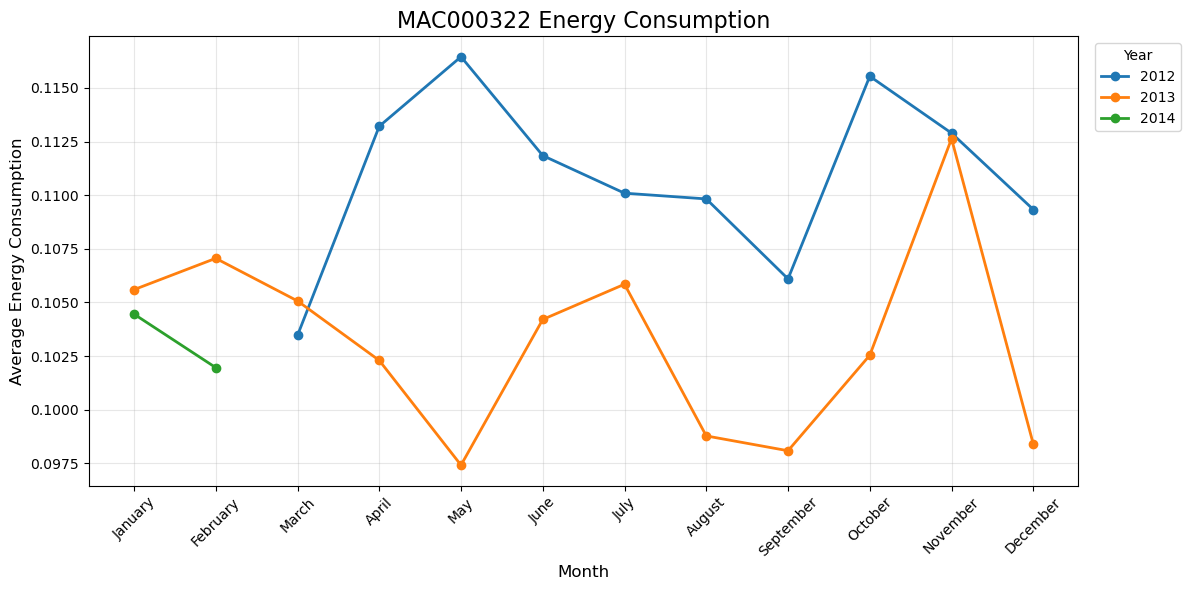

In [ ]:
# copilot prompt:
# i have energy consumption data over a few years but it’s 
# messy some months are missing and i want to plot it using matplotlib 
# but keep the months in jan to dec order no matter what
# and i want each year to have its own line in a different color
# Note: Code output was customized by me

import calendar

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the order of months (January to December)
month_order = list(calendar.month_name)[1:]  # Get month names without empty first element

# Create a pivot table with years as columns and months as rows
pivot_data = data.pivot_table(
    index='month_name', 
    columns='year', 
    values='energy_consumption',
    aggfunc='mean'
)

# Reindex the pivot table to ensure all months appear in calendar order
# This will add NaN for missing months
pivot_data = pivot_data.reindex(month_order)

# Sort the columns (years) in ascending order
pivot_data = pivot_data.sort_index(axis=1)

# Plot each year
for year in sorted(pivot_data.columns):
    # Plot with NaN values creating breaks in the line
    pivot_data[year].plot(
        ax=ax,
        label=str(year),
        linewidth=2,
    )


ax.set_title('MAC000322 Energy Consumption', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Energy Consumption', fontsize=12)
ax.legend(title='Year', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.grid(True, alpha=0.3)

ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Consumption in May 2013 is significantly lower than May 2012. There seems to be a decrease in consumption overall between 2012 and 2013

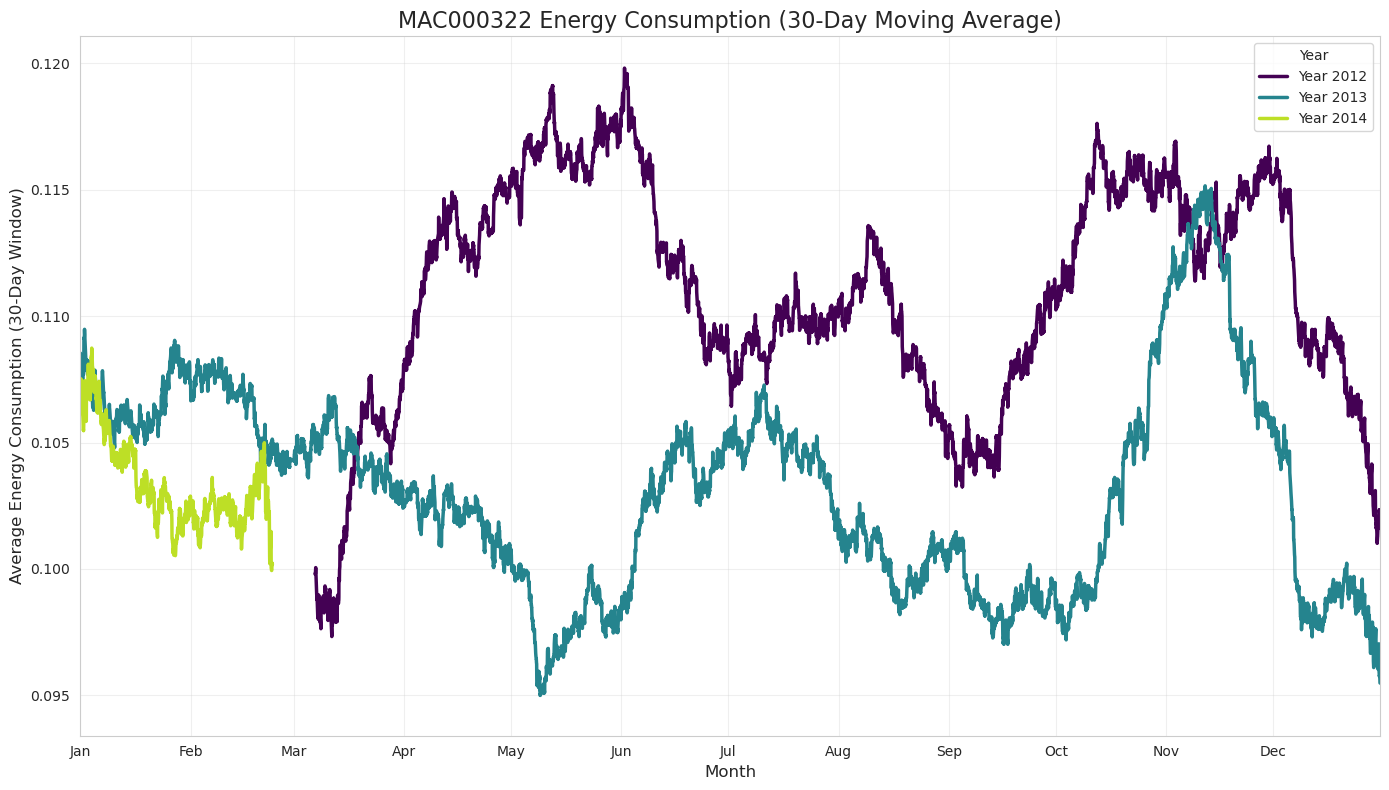

In [ ]:
# prompt:
# I want to plot the energy consumption data with a 30-day moving average
# for each year, but I want to have all years on the same plot over each other
# and use a different color for each year. The x axis should show the month names
# and the y-axis should show the average energy consumption.
# and make sure the months are in order from January to December.
from datetime import datetime
import seaborn as sns
# Assuming data has datetime index with columns including 'year' and 'energy_consumption'
# with 48 readings per day (every 30 minutes)

# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(14, 8))

# Calculate window size: 30 days * 48 readings per day
window_size = 30 * 48

# Get unique years and assign colors
years = sorted(data['year'].unique())
colors = plt.cm.viridis(np.linspace(0, 0.9, len(years)))

# Create a reference year (e.g., 2000) to overlay all data
reference_year = 2000

for i, year in enumerate(years):
    # Filter data for the current year
    year_data = data[data['year'] == year].copy()
    
    # Reset index to make datetime accessible
    year_data = year_data.reset_index()
    
    # Make sure datetime is properly named
    date_col = 'datetime' if 'datetime' in year_data.columns else year_data.columns[0]
    
    # Sort by datetime to ensure proper ordering
    year_data = year_data.sort_values(date_col)
    
    # Apply rolling mean with window of 30 days
    year_data['smoothed_energy'] = year_data['energy_consumption'].rolling(
        window=window_size, 
        center=True,
        min_periods=window_size//4
    ).mean()
    
    # Create new datetime objects with the reference year
    year_data['reference_date'] = year_data[date_col].apply(
        lambda x: datetime(
            reference_year, 
            x.month, 
            x.day, 
            x.hour if hasattr(x, 'hour') else 0, 
            x.minute if hasattr(x, 'minute') else 0, 
            x.second if hasattr(x, 'second') else 0
        )
    )
    
    # Plot using the reference date
    plt.plot(
        year_data['reference_date'], 
        year_data['smoothed_energy'],
        color=colors[i],
        linewidth=2.5,
        label=f'Year {year}'
    )

# Customize the plot
plt.title('MAC000322 Energy Consumption (30-Day Moving Average)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Energy Consumption (30-Day Window)', fontsize=12)
plt.legend(title='Year', loc='best')
plt.grid(True, alpha=0.3)

# Format x-axis to show only month names
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.xlim(datetime(reference_year, 1, 1), datetime(reference_year, 12, 31))

# Add tick marks at the beginning of each month
month_ticks = [datetime(reference_year, month, 1) for month in range(1, 13)]
plt.xticks(month_ticks)

plt.tight_layout()
plt.show()

The plot became messier because for every 48*30 readings, we have a point. The same insights are still there.

# Seasonal Plots

In [73]:
data

,energy_consumption,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,...,holiday,year,month,month_name,day,dayofweek,hour,minute,week,day_name
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-07 00:00:00,0.125,13.310000,199.000000,5.530000,2.410000,1024.14,2.650000,3.760000,rain,partly-cloudy-night,...,False,2012,3,March,7,2,0,0,10,Wednesday
2012-03-07 00:30:00,0.104,13.076256,200.535182,5.138001,1.428535,1024.14,2.674268,5.482299,rain,partly-cloudy-night,...,False,2012,3,March,7,2,0,30,10,Wednesday
2012-03-07 01:00:00,0.133,12.940000,202.000000,5.720000,2.450000,1023.4,2.530000,4.390000,rain,partly-cloudy-night,...,False,2012,3,March,7,2,1,0,10,Wednesday
2012-03-07 01:30:00,0.145,13.971702,203.474782,5.629329,2.537042,1023.4,2.458219,5.638353,rain,partly-cloudy-night,...,False,2012,3,March,7,2,1,30,10,Wednesday
2012-03-07 02:00:00,0.109,13.370000,204.000000,5.840000,2.600000,1022.34,2.470000,4.830000,rain,clear-night,...,False,2012,3,March,7,2,2,0,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-23 21:30:00,0.116,14.038285,175.916536,10.179513,6.055966,1010.07,9.426990,6.342222,rain,clear-night,...,False,2014,2,February,23,6,21,30,8,Sunday
2014-02-23 22:00:00,0.108,14.000000,174.000000,10.100000,5.580000,1010.05,10.100000,6.060000,rain,clear-night,...,False,2014,2,February,23,6,22,0,8,Sunday
2014-02-23 22:30:00,0.129,14.521666,173.479948,9.208093,5.933318,1010.05,8.363793,5.795226,rain,clear-night,...,False,2014,2,February,23,6,22,30,8,Sunday


In [83]:
plot_df = data.groupby(["year", data.index.month])[['energy_consumption',"temperature"]].mean()
plot_df['energy_consumption'] = plot_df['energy_consumption'] / plot_df['energy_consumption'].max()
plot_df['temperature'] = plot_df['temperature'] / plot_df['temperature'].max()
plot_df

energy_consumption  temperature
year timestamp                                 
2012 3                    0.888452     0.486097
     4                    0.972169     0.429267
     5                    1.000000     0.673228
     6                    0.960434     0.746087
     7                    0.945385     0.840207
     8                    0.943089     0.915348
     9                    0.911089     0.729954
     10                   0.992186     0.546692
     11                   0.969426     0.389874
     12                   0.938851     0.292629
2013 1                    0.906767     0.224609
     2                    0.919304     0.189562
     3                    0.902255     0.191295
     4                    0.878435     0.430589
     5                    0.836520     0.581771
     6                    0.894834     0.753579
     7                    0.908937     1.000000
     8                    0.848211     0.923023
     9                    0.842281     0.738479
     10                   0.880505     0.665828
     11                   0.967184     0.378173
     12                   0.844962     0.360494
2014 1                    0.896986     0.350746
     2                    0.875562     0.365623

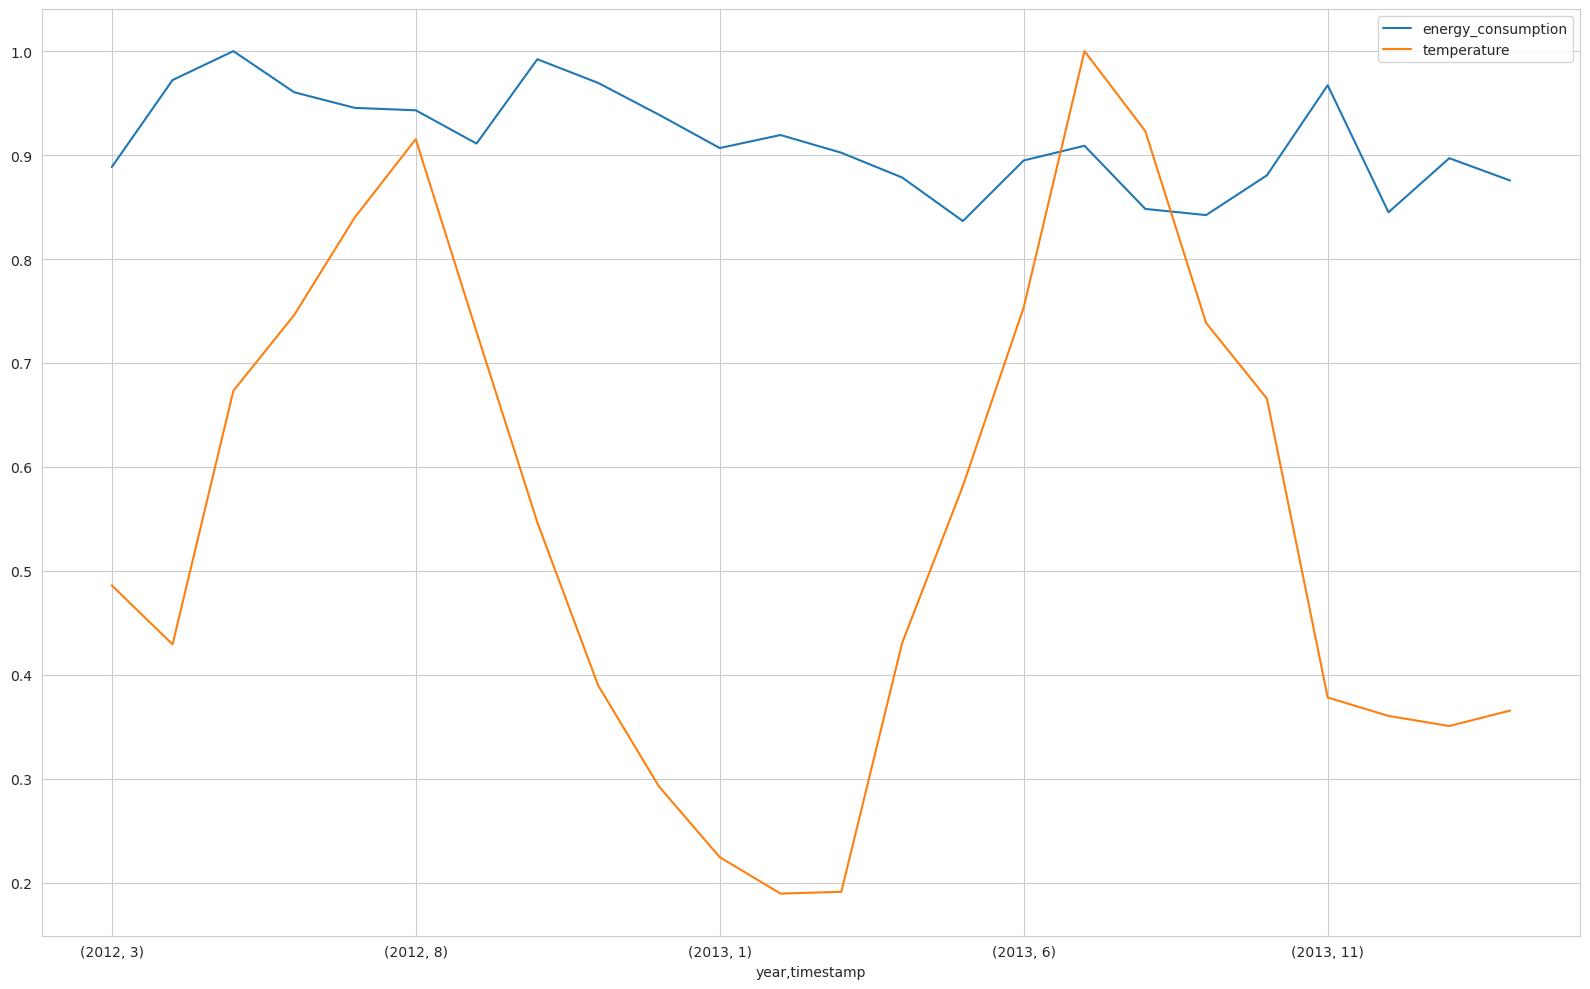

In [84]:
fig, ax = plt.subplots(1,1)
plot_df.plot(ax=ax)
fig.tight_layout()

Once temperature lowers, energy consumption also lowers.

In [85]:
plot_df = data.groupby(["day", "hour"])[['energy_consumption',"temperature"]].mean()
plot_df['energy_consumption'] = plot_df['energy_consumption'] / plot_df['energy_consumption'].max()
plot_df['temperature'] = plot_df['temperature'] / plot_df['temperature'].max()

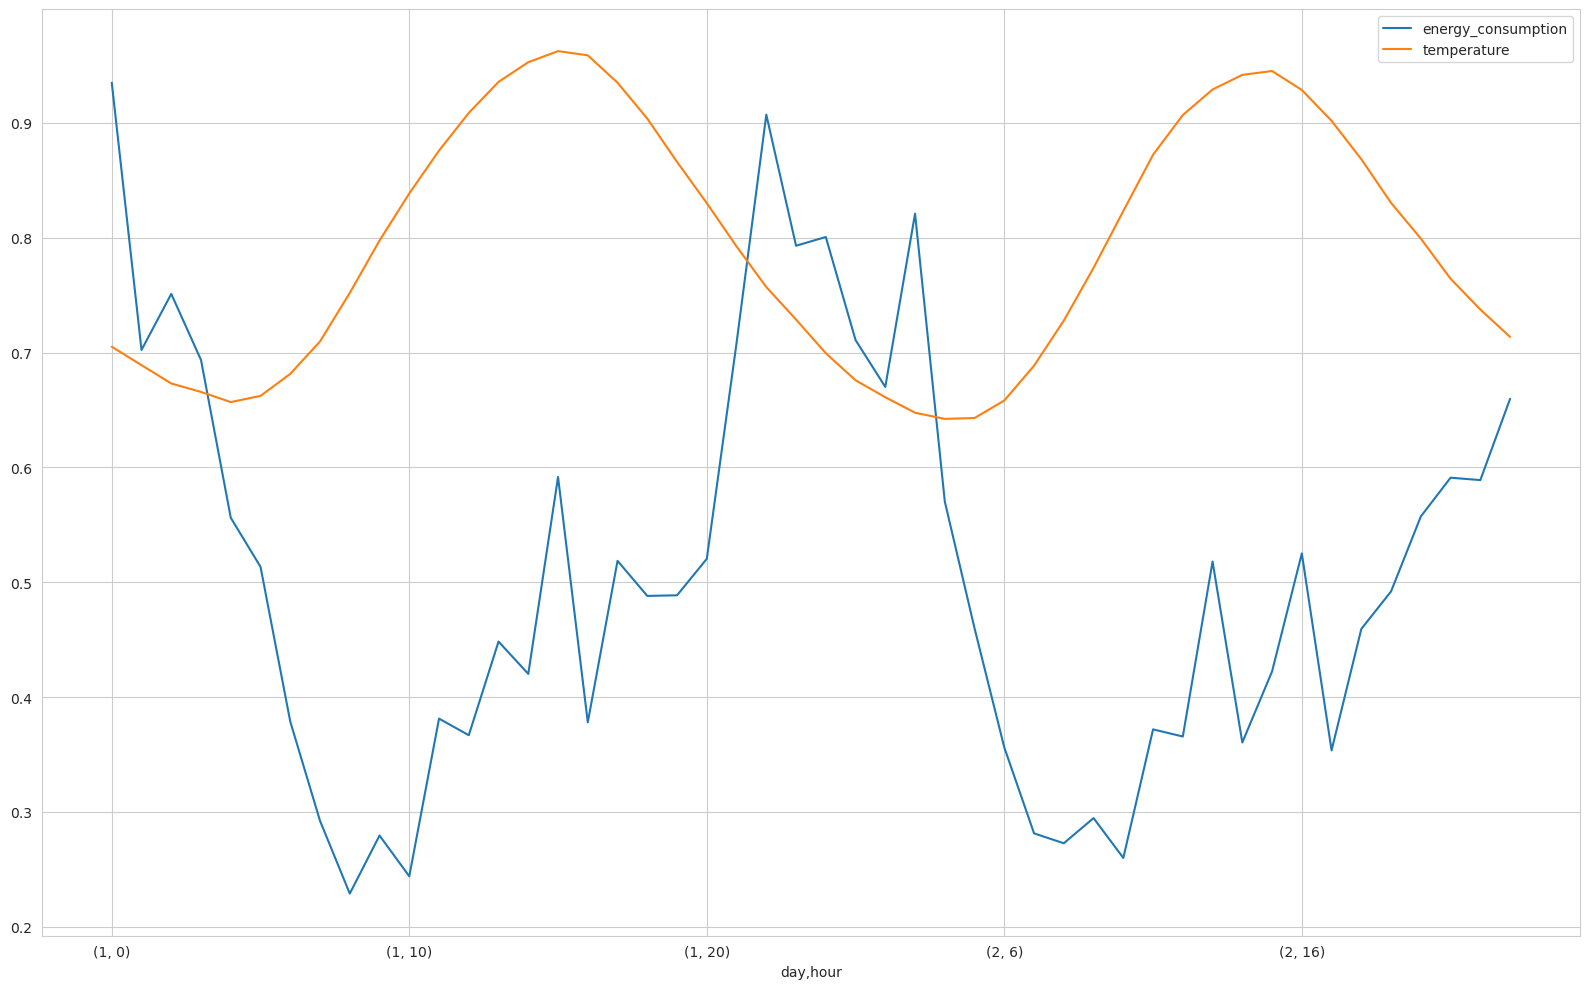

In [86]:
fig, ax = plt.subplots(1,1)
plot_df.iloc[:48].plot(ax=ax)
fig.tight_layout()

Energy consumption is higher during night.

# Seasonal Box Plot

In [89]:
plot_df =  data.groupby(["timestamp","day_name", "hour"])["energy_consumption"].mean().sort_index().dropna().reset_index()

In [91]:
plot_df.query('(day_name == "Monday") & (hour == 0)')

,timestamp,day_name,hour,energy_consumption
240,2012-03-12 00:00:00,Monday,0,0.131
241,2012-03-12 00:30:00,Monday,0,0.100
576,2012-03-19 00:00:00,Monday,0,0.083
577,2012-03-19 00:30:00,Monday,0,0.439
912,2012-03-26 00:00:00,Monday,0,0.101
...,...,...,...,...
33505,2014-02-03 00:30:00,Monday,0,0.124
33840,2014-02-10 00:00:00,Monday,0,0.096
33841,2014-02-10 00:30:00,Monday,0,0.077
34176,2014-02-17 00:00:00,Monday,0,0.120


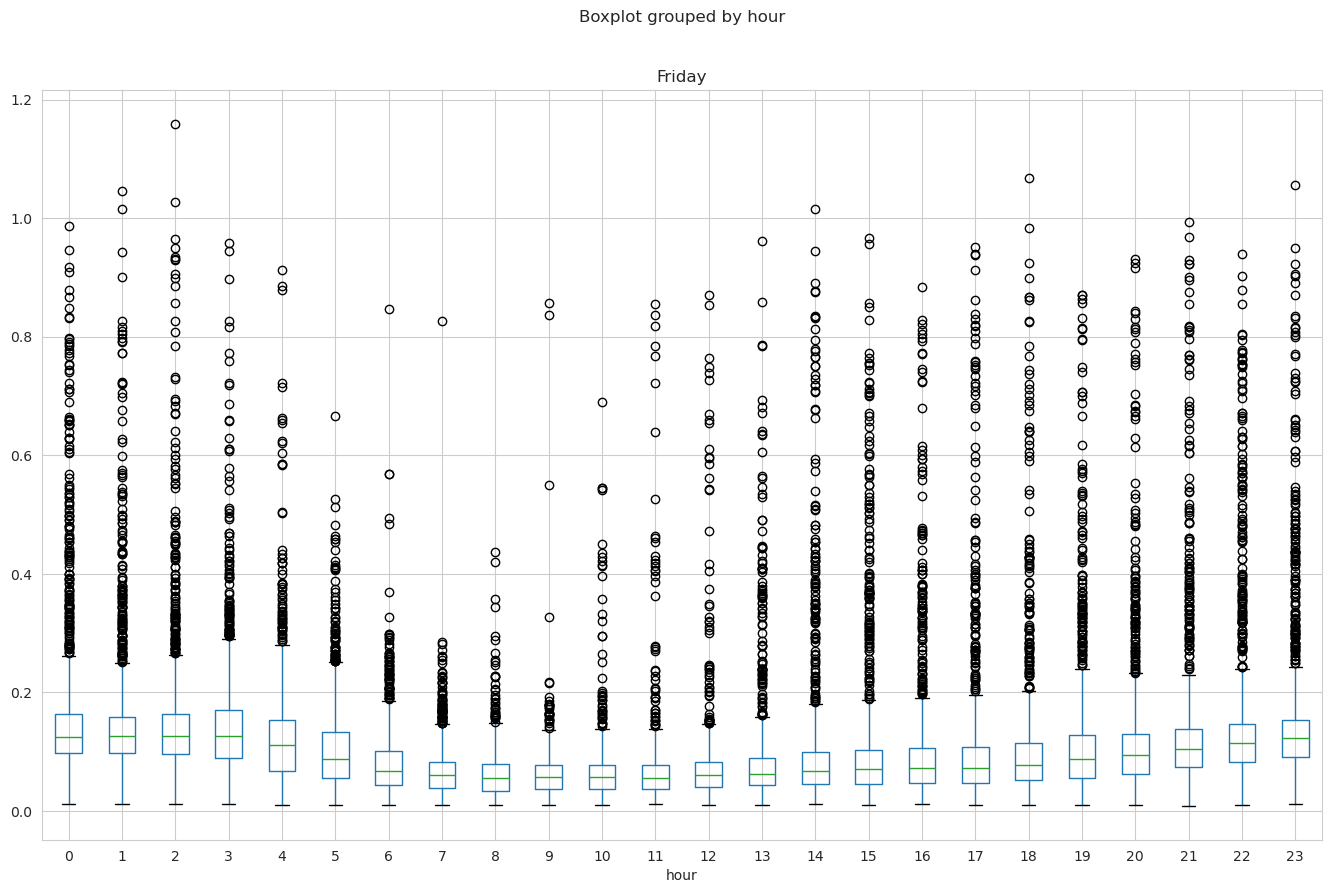

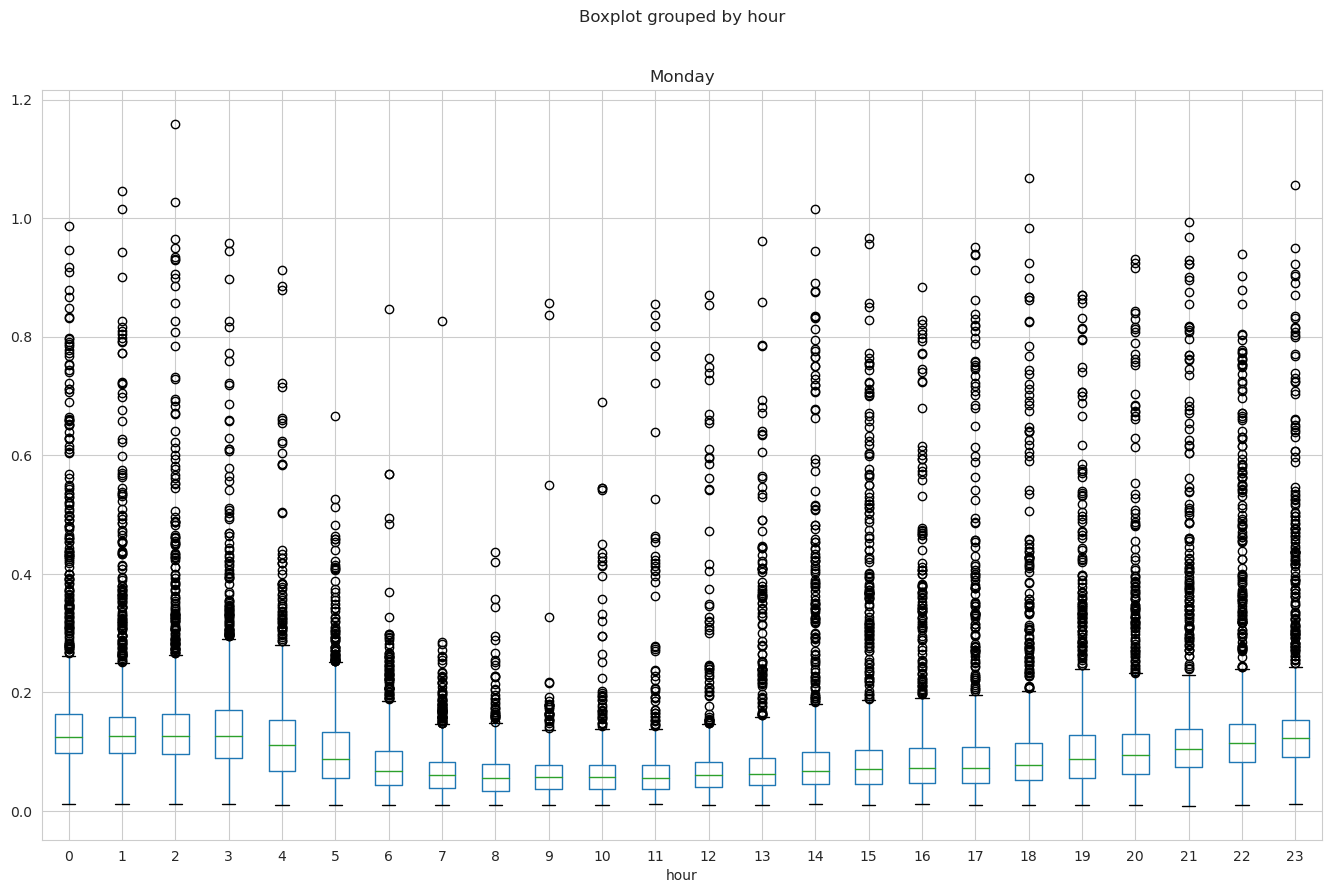

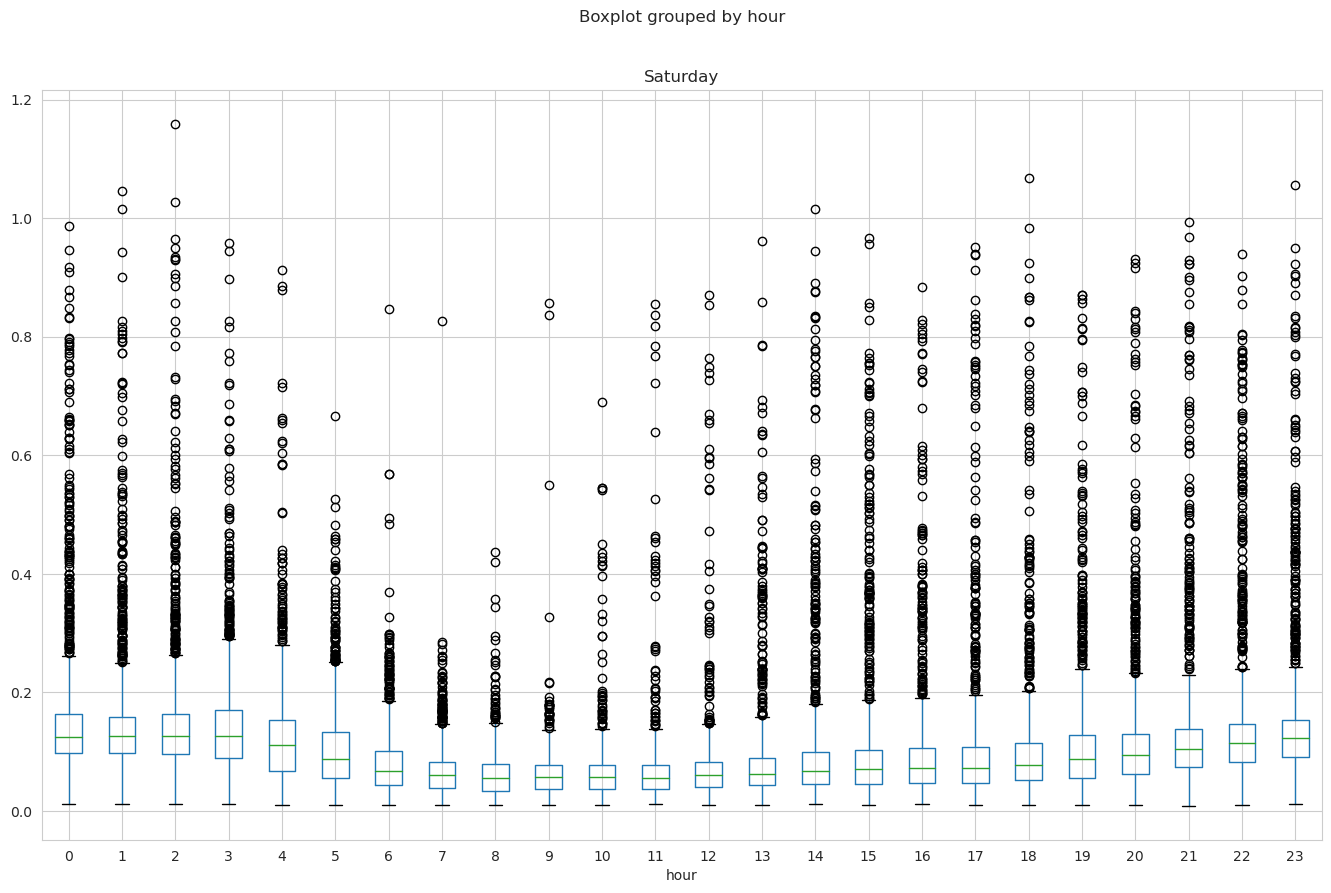

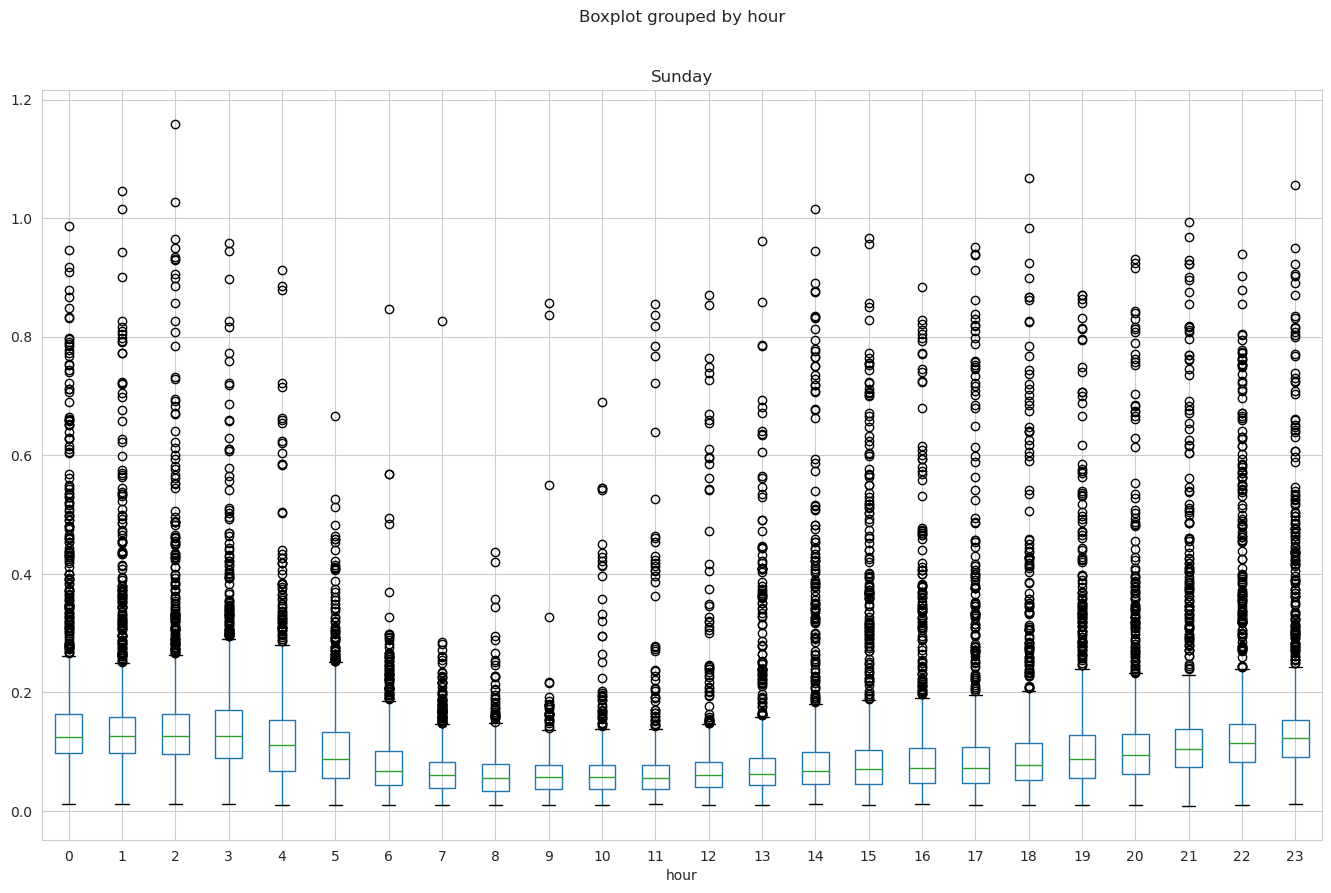

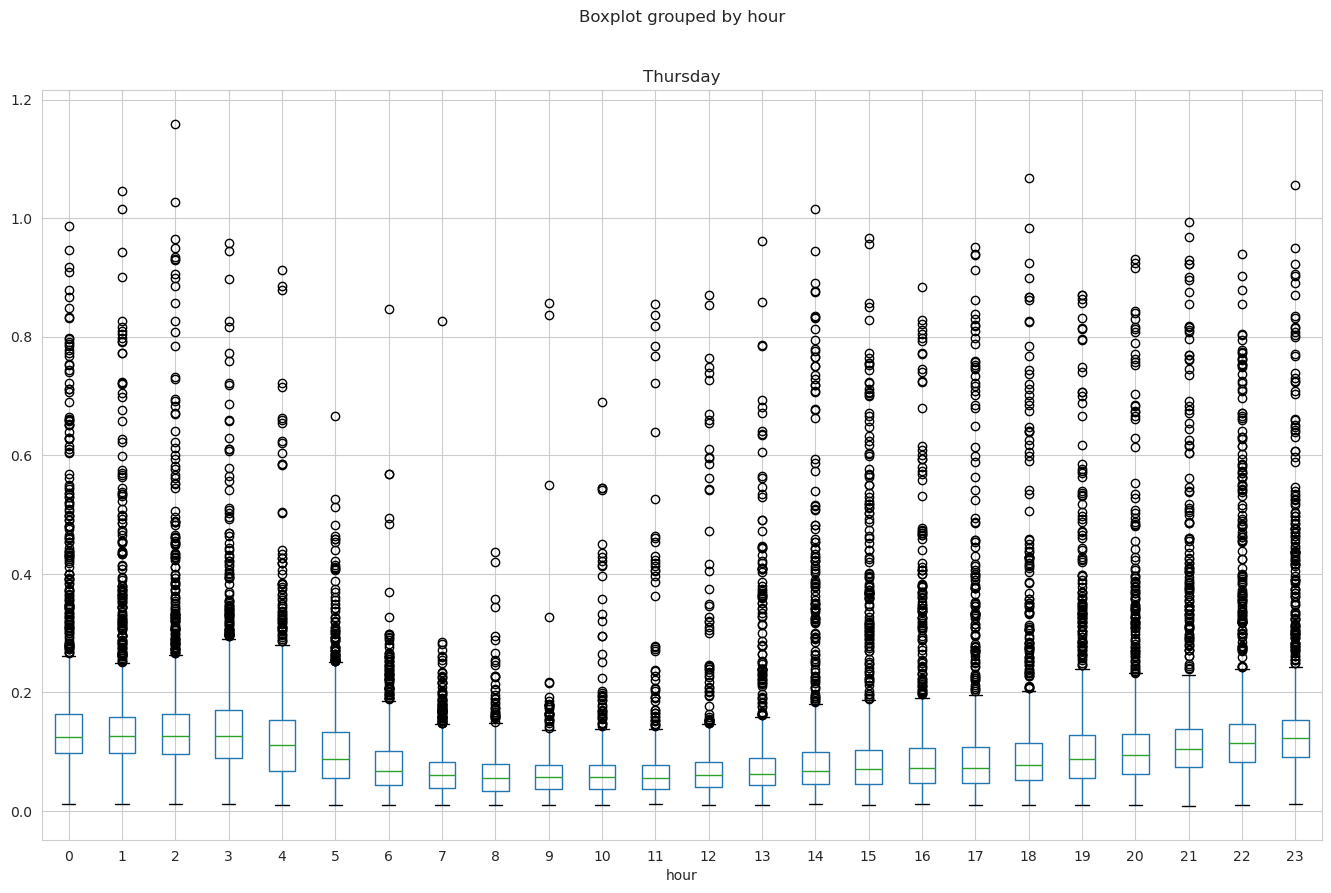

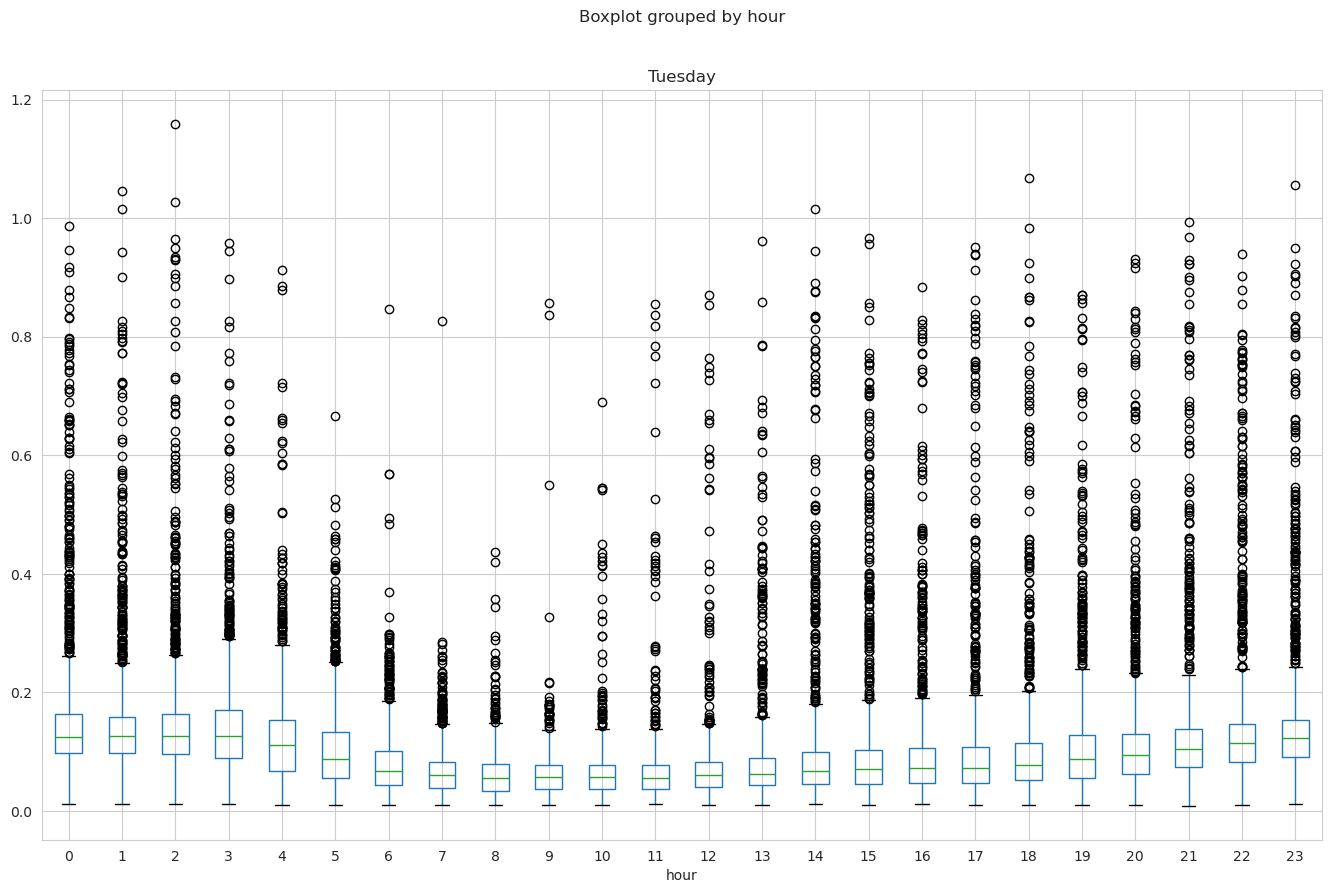

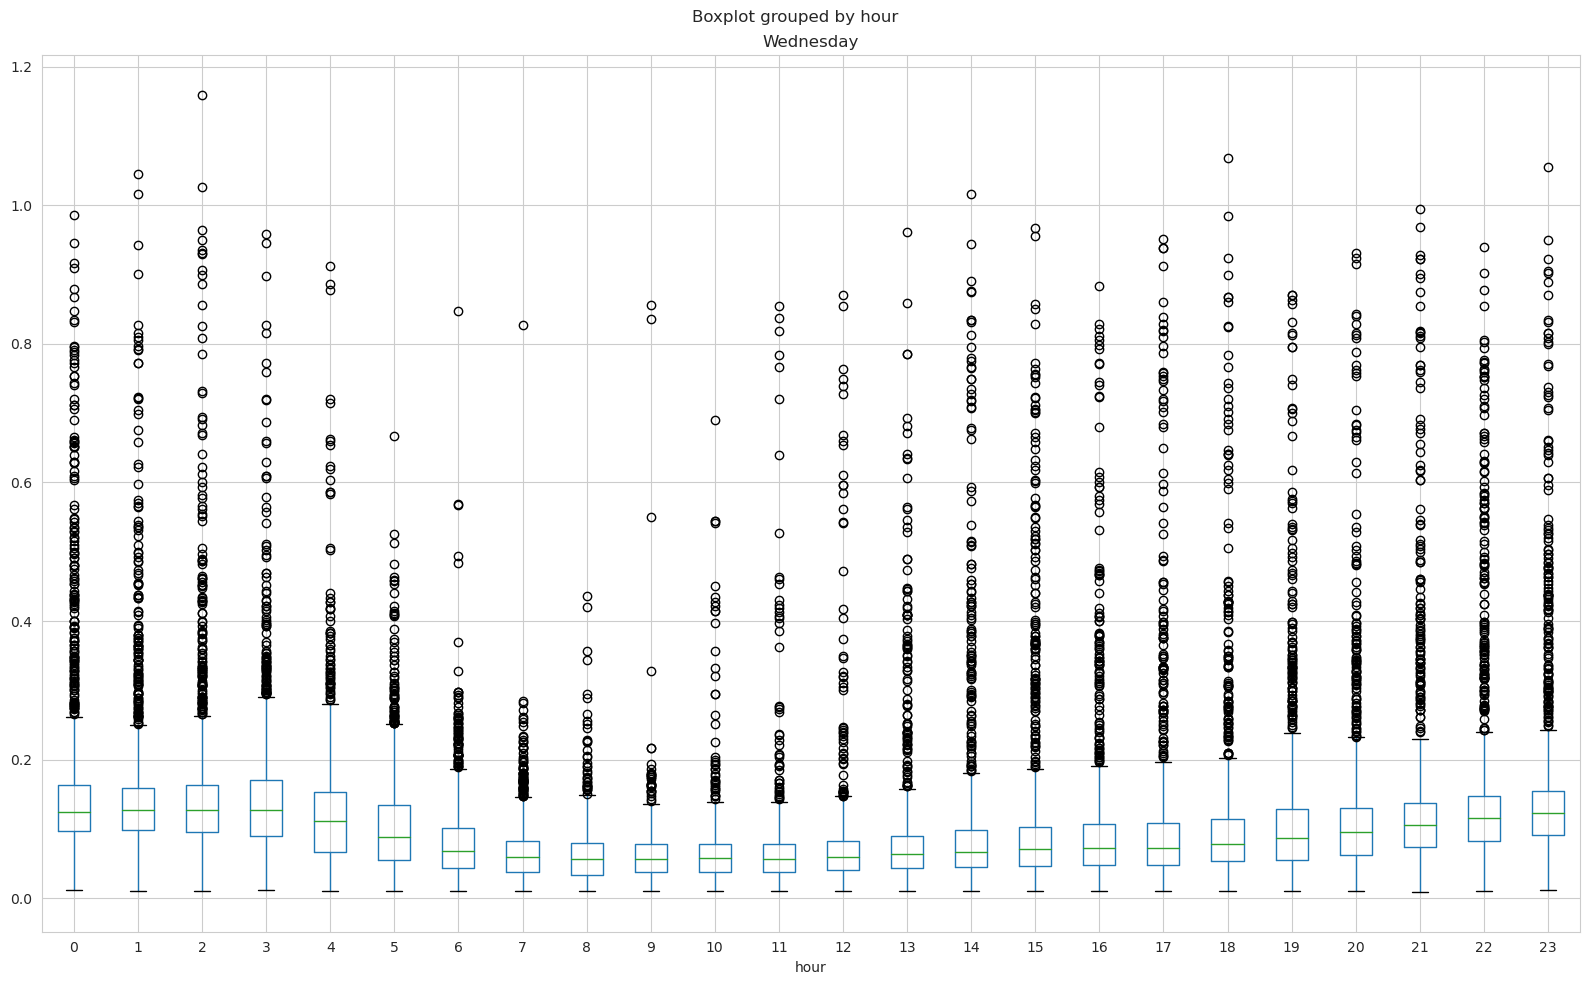

In [92]:
for weekday, group in plot_df.groupby('day_name'):
  fig, ax=  plt.subplots(1,1)
  plot_df.boxplot(column='energy_consumption', by='hour',ax=ax)
  ax.set_title(weekday)
fig.tight_layout()

# Heatmaps

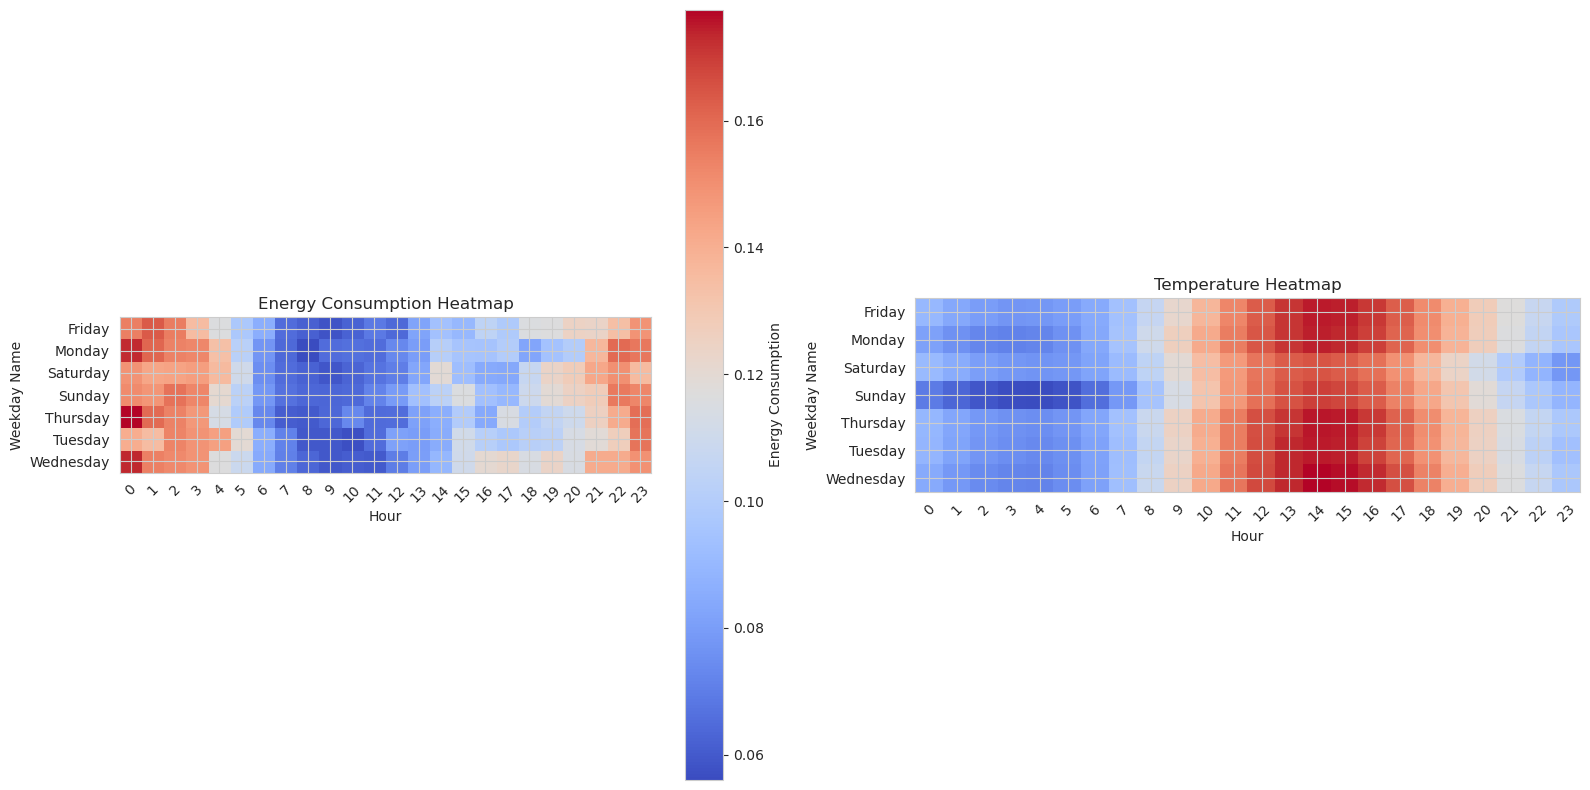

In [93]:
energy_plot_df = pd.pivot_table(data, index="day_name", values='energy_consumption', columns="hour", aggfunc="mean")
temp_plot_df = pd.pivot_table(data, index="day_name", values='temperature', columns="hour", aggfunc="mean")

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
img = axs[0].imshow(energy_plot_df, cmap='coolwarm', interpolation='nearest')
fig.colorbar(img, label='Energy Consumption')
axs[0].set_xticks(range(len(energy_plot_df.columns)), energy_plot_df.columns, rotation=45)
axs[0].set_yticks(range(len(energy_plot_df.index)), energy_plot_df.index)
axs[0].set_xlabel("Hour")
axs[0].set_ylabel("Weekday Name")
axs[0].set_title("Energy Consumption Heatmap")

img = axs[1].imshow(temp_plot_df, cmap='coolwarm', interpolation='nearest')
axs[1].set_xticks(range(len(temp_plot_df.columns)), temp_plot_df.columns, rotation=45)
axs[1].set_yticks(range(len(temp_plot_df.index)), temp_plot_df.index)
axs[1].set_xlabel("Hour")
axs[1].set_ylabel("Weekday Name")
axs[1].set_title("Temperature Heatmap")

fig.tight_layout()



As figured in the plots before. Energy consumption increases by the night.

Temperature is higher during the day.

# Time Series Decomposition

Using Loess to decompose the data.

In [94]:
from statsmodels.nonparametric.smoothers_lowess import lowess

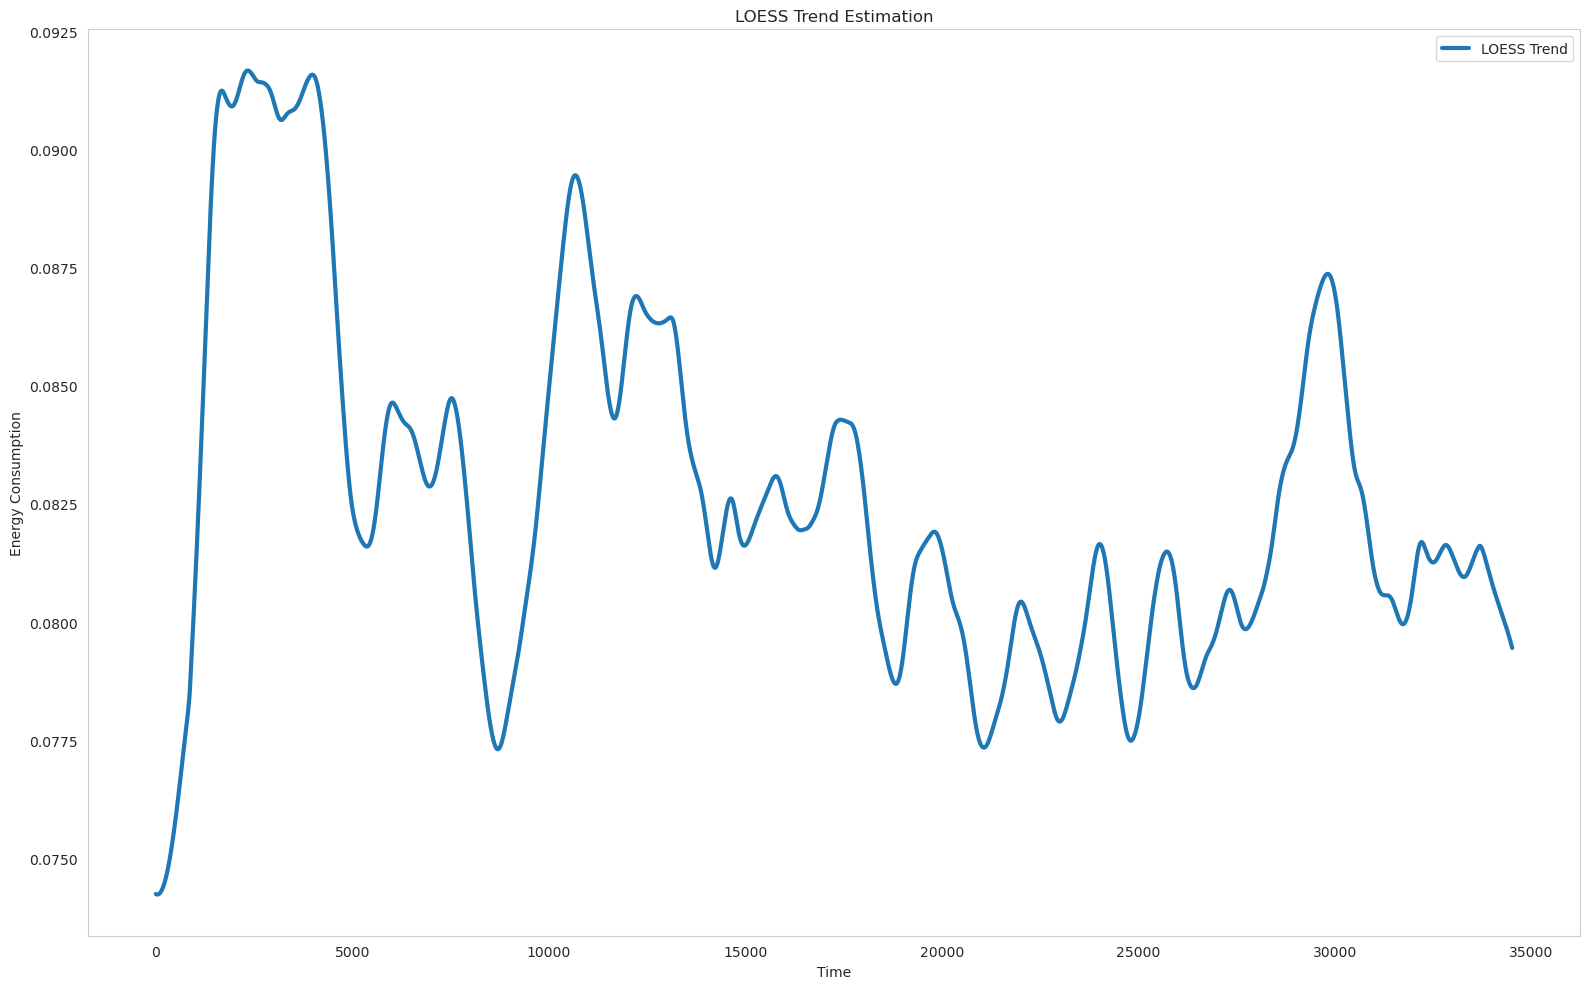

In [ ]:
# copilot prompt:
# I want to plot the energy consumption data with a LOESS trend line
# with time as x axis label and energy consumption as y axis label
# and include title and a grid
# The prompt didn't succeed so I used the way it was written in the notebook and wrote it in my own way

def plot_loess(df, frac=0.05):
    trend = lowess(df['energy_consumption'], np.arange(len(df)), frac=frac)[:, 1]
    fig, ax = plt.subplots()
    ax.plot(trend, label='LOESS Trend', linewidth=3)
    ax.set(title='LOESS Trend Estimation', xlabel='Time', ylabel='Energy Consumption')
    ax.legend()
    ax.grid()
    fig.tight_layout()
    plt.show()

plot_loess(data)

Using Fourier to decompose the data seasonality. 

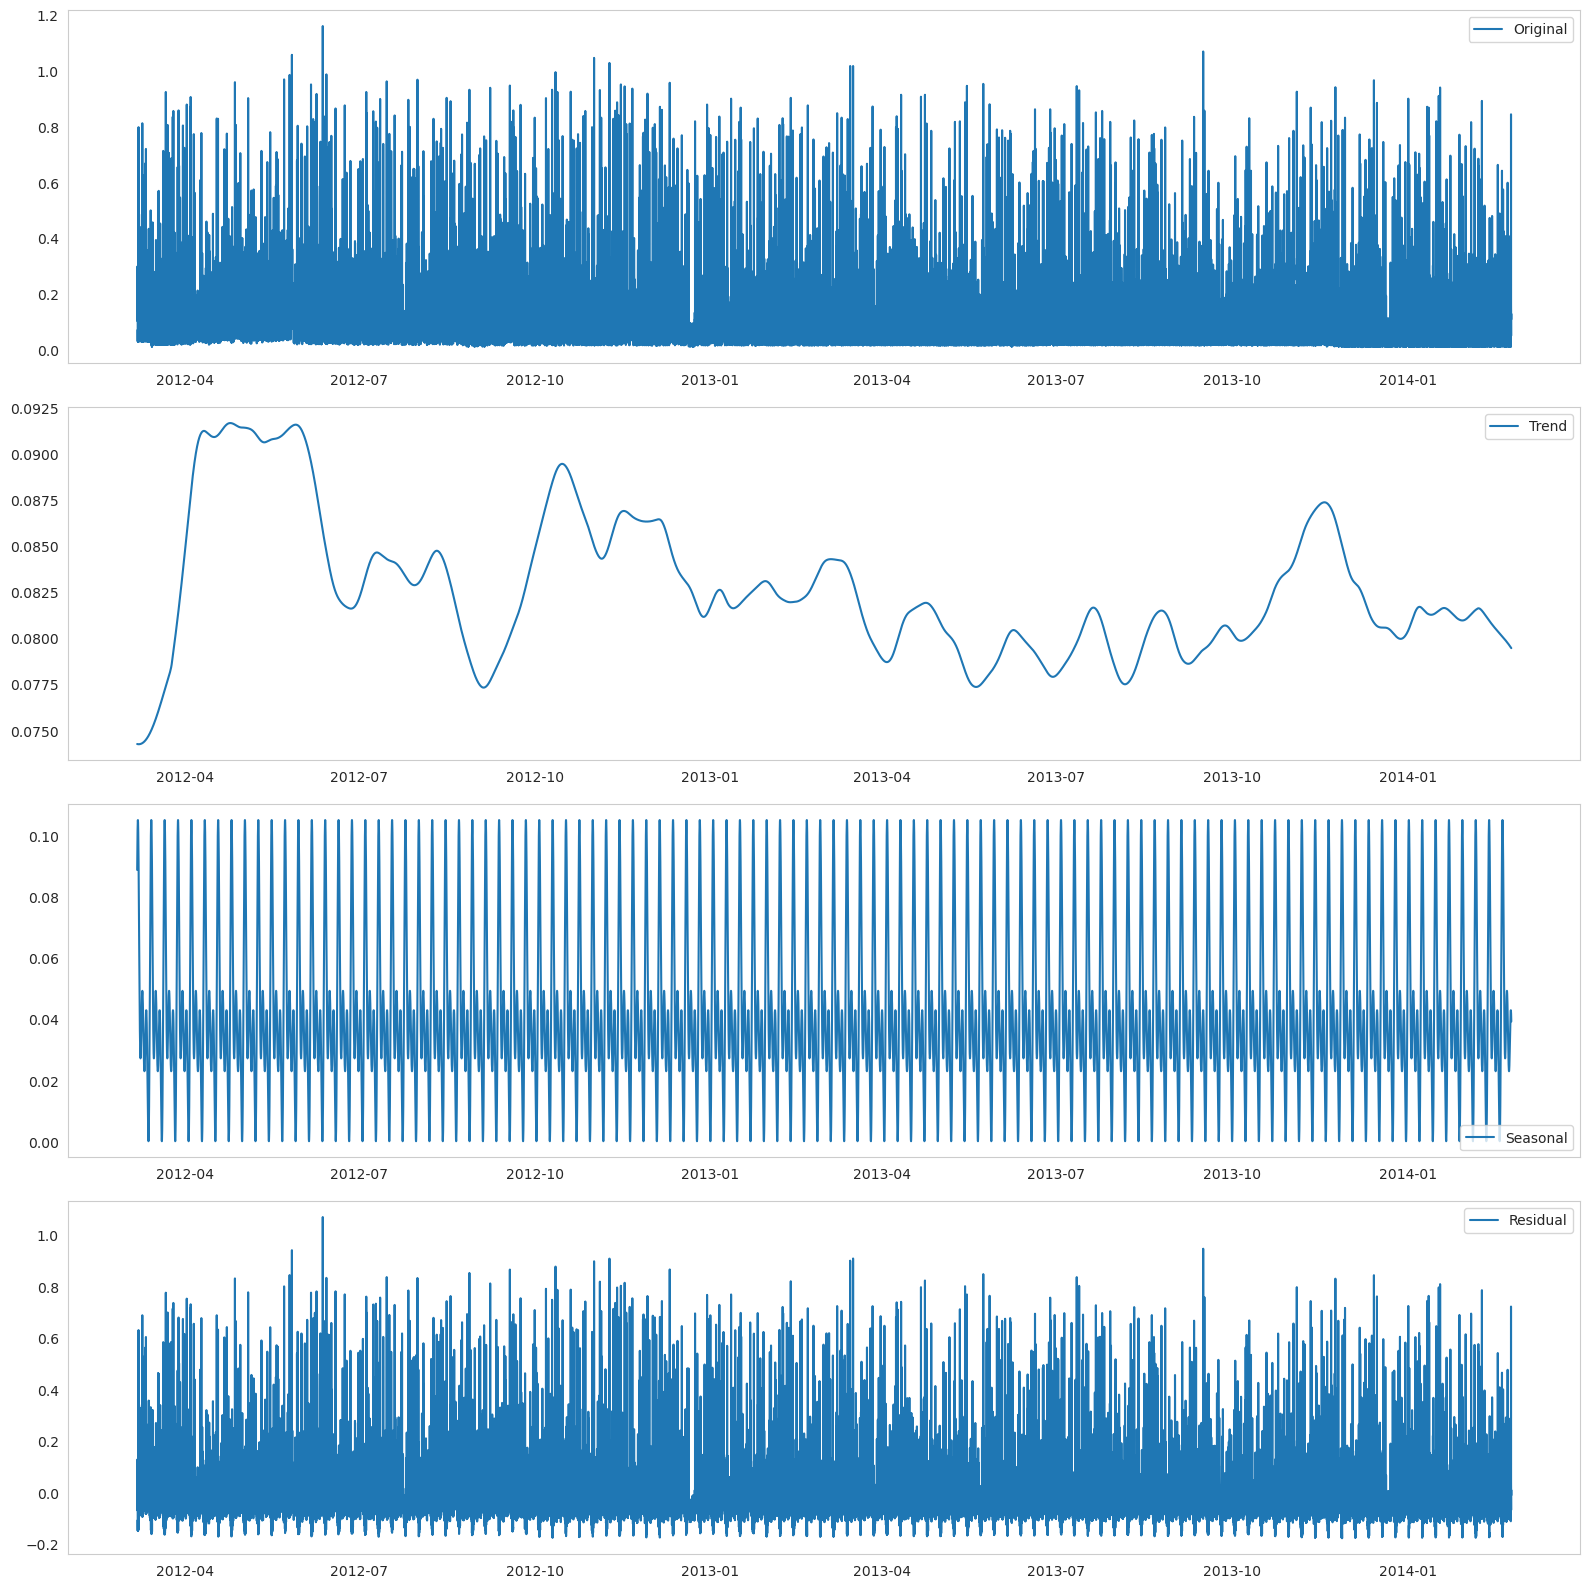

In [ ]:
# I wrote this in my own way but used the notebook as a reference so copied some code

def plot_fourier_decomposition(df, col, period, harmonics):
    t = np.arange(len(df))
    base = df[col].values
    trend = lowess(base, t, frac=0.05)[:, 1]
    detrended = base - trend

    season = sum(np.sin(2 * np.pi * i * t / period) + np.cos(2 * np.pi * i * t / period) for i in range(1, harmonics + 1))
    season = (season - season.min()) / (season.max() - season.min()) * detrended.std()
    resid = detrended - season

    series = [base, trend, season, resid]
    labels = ['Original', 'Trend', 'Seasonal', 'Residual']
    fig, axs = plt.subplots(4, 1, figsize=(16, 16))

    for ax, y, label in zip(axs, series, labels):
        ax.plot(df.index, y, label=label)
        ax.legend()
        ax.grid()

    fig.tight_layout()

plot_fourier_decomposition(data, 'energy_consumption', 7*48, 3)
